In [57]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

import scipy.stats as stat
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_prominences, peak_widths
from scipy.stats import linregress

import itertools

import helperfile as hf


In [2]:
# Block of Code to show FIT Image

# bins, intensities  = hf.CreateData('180NoBRun1.txt')
# bins, intensities =  np.array(bins), np.array(intensities)
# hf.Plots(bins, intensities, "B=0.384 kG, Polarize = 180 deg, Intensity Plot - Full set", 'Bins', 'Intensity [ADU] ', figsize0= 15, figsize1=4)

In [4]:
# STEP 1: Load Data 
xy1 = np.loadtxt('XYR1_90_Dic.txt', dtype=int, delimiter=',')
xy2 = np.loadtxt('XYR2_90_Dic.txt', dtype=int, delimiter=',')
xy3 = np.loadtxt('XYR3_90_Dic.txt', dtype=int, delimiter=',')
print(type(xy1))

<class 'numpy.ndarray'>


In [33]:
# # STEP 2: Check all graphs  

# hf.MakeManyPlots(xy1)

Data ratio set


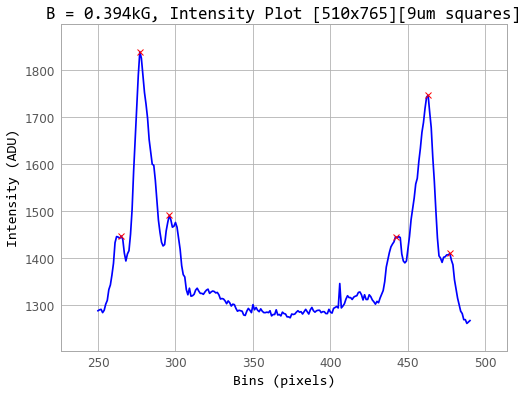

In [43]:
# STEP 5: TRUNCATE TO THE FIRST ORDER
peaks1, x_1, y_1 = hf.LabelPeaks_ShrinkData(xy1[0],xy1[1],250,490,1400)
peaks2, x_2, y_2 = hf.LabelPeaks_ShrinkData(xy1[2],xy1[3],250,490,1400)
peaks3, x_3, y_3 = hf.LabelPeaks_ShrinkData(xy1[4],xy1[5],250,490,1402)
# peaks4, x_4, y_4 = hf.LabelPeaks_ShrinkData(xy1[6],xy1[7],250,490,1402)
# ---------------IGNORE (8,9),(10,11),(12,13)--------------------------
peaks4, x_4, y_4 = hf.LabelPeaks_ShrinkData(xy1[14],xy1[15],250,490,1402)
peaks5, x_5, y_5 = hf.LabelPeaks_ShrinkData(xy1[16],xy1[17],250,490,1450)
peaks6, x_6, y_6 = hf.LabelPeaks_ShrinkData(xy1[18],xy1[19],250,490,1400)
peaks7, x_7, y_7 = hf.LabelPeaks_ShrinkData(xy1[20],xy1[21],250,490,1400)
peaks8, x_8, y_8 = hf.LabelPeaks_ShrinkData(xy1[22],xy1[23],250,490,1400)


# hf.Plots(x_1,y_1, 
#     'B = 0.440kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=8
#     )
# hf.PlotNewPeaks(peaks1,xy1[1])


# hf.Plots(x_2,y_2, 
#     'B = 0.414kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks2,xy1[3])

# hf.Plots(x_3,y_3, 
#     'B = 0.424kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks3,xy1[5])


# -------Visual use but not data use -- IGNORE ------------------(6,7)
# hf.Plots(x_,y_, 
#     'B = ____kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks_,xy1[_])

# -------------Same for (8,9),(10,11),(12,13)---------------


# hf.Plots(x_4,y_4, 
#     'B = 0.353kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks4,xy1[15])


# hf.Plots(x_5,y_5, 
#     'B = 0.362kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks5,xy1[17])

# hf.Plots(x_6,y_6, 
#     'B = 0.374kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks6,xy1[19])

# hf.Plots(x_7,y_7, 
#     'B = 0.384kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks7,xy1[21])

hf.Plots(x_8,y_8, 
    'B = 0.394kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks8,xy1[23])



In [48]:
# STEP 6: CREATE RADIUS ARRAY 
B1 = 0.440E3 #Gauss
R1_1 = hf.RadiusMeter(peaks1[0], peaks1[-1])
R1_2 = hf.RadiusMeter(peaks1[1], peaks1[-2])
R1_3 = hf.RadiusMeter(peaks1[2], peaks1[-3])

B2 = 0.414E3
R2_1 = hf.RadiusMeter(peaks2[0], peaks2[-1])
R2_2 = hf.RadiusMeter(peaks2[1], peaks2[-2])
R2_3 = hf.RadiusMeter(peaks2[2], peaks2[-3])

B3 = 0.424E3
R3_1 = hf.RadiusMeter(peaks3[0], peaks3[-1])
R3_2 = hf.RadiusMeter(peaks3[2], peaks3[-2])
R3_3 = hf.RadiusMeter(peaks3[3], peaks3[-3])

B4 = 0.353E3
R4_1 = hf.RadiusMeter(peaks4[0], peaks4[-1])
R4_2 = hf.RadiusMeter(peaks4[1], peaks4[-2])
R4_3 = hf.RadiusMeter(peaks4[2], peaks4[-3])

B5 = 0.362E3
R5_1 = hf.RadiusMeter(peaks5[0], peaks5[-1])
R5_2 = hf.RadiusMeter(peaks5[1], peaks5[-2])
R5_3 = hf.RadiusMeter(peaks5[2], peaks5[-3])

B6 = 0.374E3
R6_1 = hf.RadiusMeter(peaks6[0], peaks6[-1])
R6_2 = hf.RadiusMeter(peaks6[1], peaks6[-2])
R6_3 = hf.RadiusMeter(peaks6[2], peaks6[-3])

B7 = 0.384E3
R7_1 = hf.RadiusMeter(peaks7[0], peaks7[-1])
R7_2 = hf.RadiusMeter(peaks7[1], peaks7[-2])
R7_3 = hf.RadiusMeter(peaks7[2], peaks7[-3])

B8 = 0.394E3
R8_1 = hf.RadiusMeter(peaks8[0], peaks8[-1])
R8_2 = hf.RadiusMeter(peaks8[1], peaks8[-2])
R8_3 = hf.RadiusMeter(peaks8[2], peaks8[-3])

radii = [
    R1_1, R1_2, R1_3,
    R2_1, R2_2, R2_3,
    R3_1, R3_2, R3_3,
    R4_1, R4_2, R4_3,
    R5_1, R5_2, R5_3,
    R6_1, R6_2, R6_3,
    R7_1, R7_2, R7_3,
    R8_1, R8_2, R8_3,
]

# EACH SET OF GRAPHS WILL CONTRIBUTE 2 DELTA E'S 
B = [
    B1,B1,
    B2,B2,
    B3,B3,
    B4,B4,
    B5,B5,
    B6,B6,
    B7,B7,
    B8,B8,
]

B = np.array(B)

In [49]:
# STEP 7: CREATE THETA ARRAYS 
thetas = hf.ThetasRadArray(radii)

In [50]:
# STEP 8: CREATE DELTA E ARRAYS 
delE_90 = hf.DeltaEPrime90(thetas)

In [53]:
for i in delE_90: 
    print(i)

2.4130642911978095e-17
2.5343697578154535e-17
2.6743759784825467e-17
2.5931822465633612e-17
2.6743759784825467e-17
2.709594670186143e-17
2.1663019590446636e-17
2.2475822204931205e-17
2.252193435201521e-17
2.308819804845376e-17
2.252193435201521e-17
2.308819804845376e-17
2.252193435201521e-17
2.549728324255992e-17
2.091322559187959e-17
2.6839243967891535e-17


In [54]:
for i in B: 
    print(i)

440.0
440.0
414.0
414.0
424.0
424.0
353.0
353.0
362.0
362.0
374.0
374.0
384.0
384.0
394.0
394.0


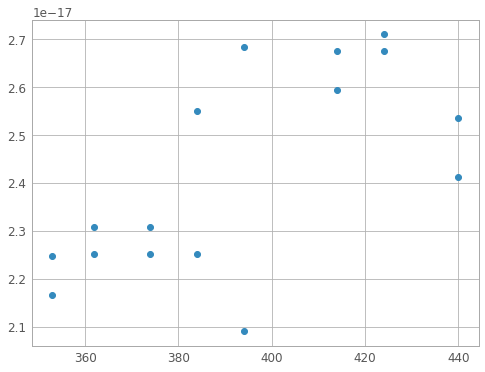

In [58]:
# STEP 9: PLOT 
# hf.Plots(B, delE_90,
#  "Delta E Vs B", 
#  "Magnetic Field (Gauss)",
#  "Energy Shift (erg)" )
plt.scatter(np.sort(B),delE_90[np.argsort(B)])


In [63]:
def DelE(B,mu_0,a):
    mu = 9.2741E-21 # erg/G
    A = 0.5
    return a*mu_0*B
p0 = [9E-21, 0.4]
sigma = np.random.uniform(min(delE_90), max(delE_90), len(delE_90))

In [75]:
params2, cov2 = curve_fit( DelE,
                    B,
                    delE_90,
                    p0= p0, 
                    absolute_sigma=False,
                    sigma=sigma
                    )

In [77]:
fit2 = DelE(B ,*params2)

[5.71109151e-20 1.07380267e+00]


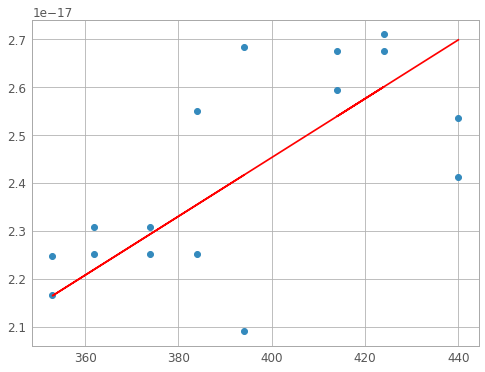

In [79]:
plt.scatter(np.sort(B),delE_90[np.argsort(B)])
plt.plot(B, fit2, label = 'fit', color = 'red')
print(params2)

In [ ]:
# # lists = sorted(itertools.izip(*[B,delE_90]))
# # x, y = list(itertools.izip(*lists))

# x, y = zip(*sorted(zip(B,delE_90)))
# plt.scatter(x,y)